In [48]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [49]:
import pandas as pd

df = pd.read_csv("/Users/meyacarlos/Desktop/ITMGT25/Pandas exercise/fct_invoice.csv")

df.head()

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon


In [50]:
#EASY

# 1. How many unique customers are in the dataset?

len(df["customer_id"].unique())

5191

In [51]:
# 2. What are the different categories of products available? How many unique categories are there?

print(df["category"].unique())

len(df["category"].unique())

['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


8

In [52]:
# 3. Which payment method is the most popular? How many times was it used?

print(df["payment_method"].value_counts())

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64


In [55]:
#MEDIUM

# 1. What are the three most popular categories, by total sales? (revised)

category_sales = df.groupby("category")["total_sales"].sum()

top_categories = category_sales.nlargest(3)

print(top_categories)


category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [72]:
df['total_sales'] = df["quantity"] * df["price"]
df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall,total_sales
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon,293.25
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul,20.92
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity,20.92
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park,16800.00


In [56]:
df.groupby("category").sum()['total_sales']

/var/folders/38/4hk607zj14gf35c9c75p_3fm0000gn/T/ipykernel_88142/2341632365.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("category").sum()['total_sales']


category
Books              8.345529e+05
Clothing           1.139968e+08
Cosmetics          6.792863e+06
Food & Beverage    8.495351e+05
Shoes              6.655345e+07
Souvenir           6.358247e+05
Technology         5.786235e+07
Toys               3.980426e+06
Name: total_sales, dtype: float64

In [57]:
df.groupby('category').sum()

/var/folders/38/4hk607zj14gf35c9c75p_3fm0000gn/T/ipykernel_88142/1847462723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('category').sum()


,customer_id,quantity,price,total_sales
category,,,,
Books,4934549,14982,226977.30,8.345529e+05
Clothing,34578159,103558,31075684.64,1.139968e+08
Cosmetics,15306996,45465,1848606.90,6.792863e+06
Food & Beverage,14752133,44277,231568.71,8.495351e+05
Shoes,9901187,30217,18135336.89,6.655345e+07
Souvenir,4911521,14871,174436.83,6.358247e+05
Technology,5069499,15021,15772050.00,5.786235e+07
Toys,9967553,30321,1086704.64,3.980426e+06


In [58]:
top_three = df.groupby('category')['total_sales'].sum().nlargest(3)
print(top_three)

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


In [59]:
import json

json_df = pd.read_json("/Users/meyacarlos/Desktop/ITMGT25/Pandas exercise/dim_customer.json")
json_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


In [60]:
# 2. What are the total sales attributed to customers over the age of 45?

m_df = df[["total_sales"]].copy()
m_df["id"] = df["customer_id"]

m_df = m_df.merge(json_df, how="left")

filtered_df = m_df[m_df["age"] > 45]
over_45 = filtered_df["total_sales"].sum()

# Print the sum of total sales for all customers over the age of 45
print("Total sales attributed to customers over the age of 45:", over_45)


Total sales attributed to customers over the age of 45: 82039768.15


In [61]:
import matplotlib.pyplot as plt
import numpy as np

/var/folders/38/4hk607zj14gf35c9c75p_3fm0000gn/T/ipykernel_88142/1989061940.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["invoice_date"] = pd.to_datetime(df["invoice_date"])


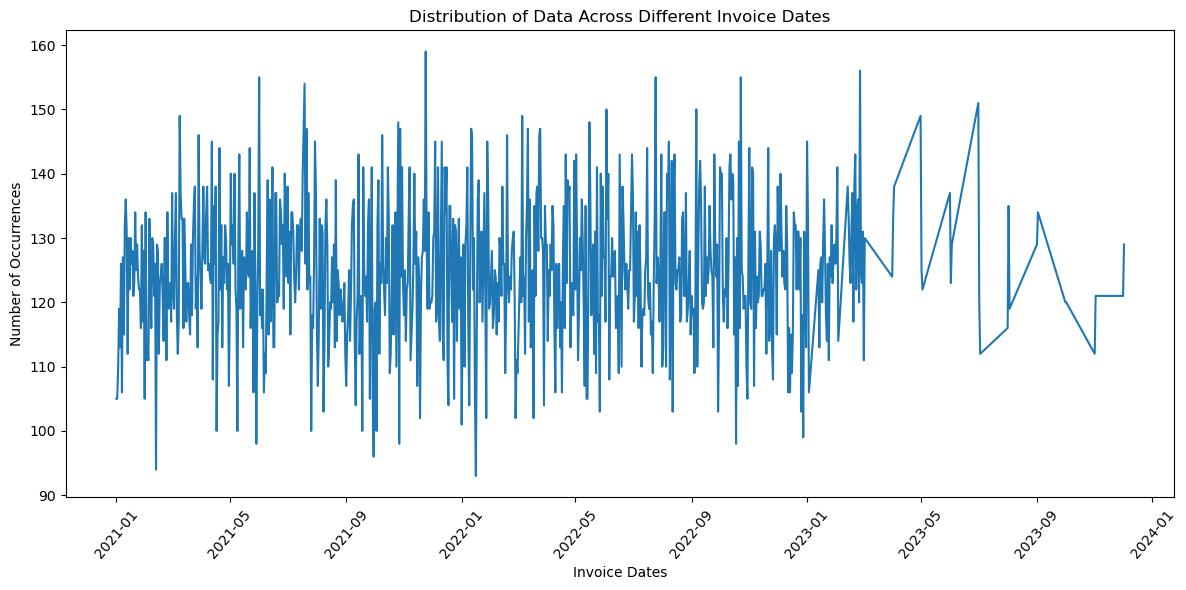

In [62]:
# 3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

df["invoice_date"] = pd.to_datetime(df["invoice_date"])

# Group the data by invoice date and count the number of occurrences
daily_counts = df["invoice_date"].value_counts().sort_index()

# Plot the size
plt.figure(figsize=(12, 6))

# X-axis then Y-axis
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel("Invoice Dates")
plt.ylabel("Number of Occurrences")
plt.title("Distribution of Data Across Different Invoice Dates")
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [ ]:
#insights: across different invoice dates, the number of occurences change and fluctuate a lot
#it is widely spread and distributed, indicating no clear pattern or trend for the distribution of data
#however, while the number of occurences fluctiated much more from 2021-01 to 2023-01, it fluctuated less often from 2023-05 to 2024-01

In [77]:
#HARD

# 1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

# Define the age bins
age_bins = range(0, 101, 10)

# Merge the data from the DataFrame and the JSON data
merged_data = df.merge(json_df, how="outer", left_on="customer_id", right_on="id")

# Categorize the age into age groups using the defined bins
merged_data["age_group"] = pd.cut(x=merged_data["age"], bins=age_bins, right=False, include_lowest=True)

# Group the data by age group
age_group_data = merged_data.groupby("age_group")["age"]

# Create a pivot table to summarize the total sales by category and age group
pivot_table = merged_data.groupby("category").first().reset_index()
pivot_table = pd.pivot_table(merged_data, values="total_sales", index="category", columns="age_group", aggfunc=np.sum)

# Print the resulting pivot table
print(pivot_table)


age_group        [0, 10)    [10, 20)     [20, 30)     [30, 40)     [40, 50)  \
category                                                                      
Books                0.0    12801.75     79461.75     84143.10     87203.40   
Clothing             0.0  1927413.84  10250732.80  11354126.96  11215189.92   
Cosmetics            0.0   109619.36    605915.32    723544.70    665034.96   
Food & Beverage      0.0    13582.31     73491.96     87246.86     89553.29   
Shoes                0.0   993281.35   5924878.24   7200839.66   7025590.02   
Souvenir             0.0    12375.15     54943.32     64092.72     66391.80   
Technology           0.0  1129800.00   5261550.00   6159300.00   5954550.00   
Toys                 0.0    60426.24    385100.80    420582.40    390906.88   

age_group           [50, 60)     [60, 70)    [70, 80)    [80, 90)  [90, 100)  
category                                                                      
Books               74962.20     80476.80    54827.